## Nutricion Facts for McDonald's Menu
<p>Here is <a href="https://www.kaggle.com/mcdonalds/nutrition-facts?select=menu.csv">data</a> contains nutrition fact of each McDonald’s menu in United States in 2017, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts. In this notebook, we're going to work with the data to answer questions below:</p>
<ul>
<p>a) How many calories does the average McDonald's value meal contain?</p>
<p>b) How much do beverages, like soda or coffee, contribute to the overall caloric intake?</p>
<p>c) Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?</p>
<p>d) What about ordering egg whites instead of whole eggs?</p>
<p>e) What is the least number of items could you order from the menu to meet one day's nutritional requirements?</p>
</ul>

<p><img src="https://i.insider.com/5cee8d1211e2050c3c7383bd?width=1100&format=jpeg&auto=webp" alt="Left Shark Steals The Show">
<em><a href="https://www.businessinsider.com/mcdonalds-international-menu-items-review-2019-5?r=US&IR=T">Some of McDonald's Menu Items</a>. Photo by Irene Jiang/Business Insider.</em></p>

In [1]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Agar plots tampil inline
%matplotlib inline


In [2]:
# Membaca dataset
menu = pd.read_csv('menu.csv')

In [3]:
# Menampilkan 5 baris pertama dari dataset
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
# Menampilkan nama dan type data
menu.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [5]:
# Menampilkan nilai Null pada tiap kolom
menu.isnull().any()

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool

In [6]:
# Menampilkan descriptive statistics dari semua kolom 
menu.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Chicken McNuggets (20 piece),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [7]:
# Menampilkan Category dari menu
menu.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

## a.) How many calories does the average McDonald's value meal contain?
<p>'Calories' column is already including data from 'Calories from Fat', so that we only need to count the average from 'Calories' column to find the answer.</p>

In [8]:
# Average calories on each categories
import matplotlib.pyplot as plt
import seaborn as sns
# Define dataframes for each category
brf = menu.loc[menu.Category == 'Breakfast']
bnp = menu.loc[menu.Category == 'Beef & Pork']
cnf = menu.loc[menu.Category == 'Chicken & Fish']
sld = menu.loc[menu.Category == 'Salads']
ssi = menu.loc[menu.Category == 'Snacks & Sides']
des = menu.loc[menu.Category == 'Desserts'] 
bev = menu.loc[menu.Category == 'Beverages']
cnt = menu.loc[menu.Category == 'Coffee & Tea']
sms = menu.loc[menu.Category == 'Smoothies & Shakes']


avg_cat = [round(brf['Calories'].mean(axis=0), 2), round(bnp['Calories'].mean(axis=0), 2), round(cnf['Calories'].mean(axis=0), 2),
          round(sld['Calories'].mean(axis=0), 2), round(ssi['Calories'].mean(axis=0), 2), round(des['Calories'].mean(axis=0), 2),
          round(bev['Calories'].mean(axis=0), 2), round(cnt['Calories'].mean(axis=0), 2), round(sms['Calories'].mean(axis=0), 2)]
index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes']
avg_cal = pd.DataFrame({'Average Calories': avg_cat}, index=index).sort_values(by='Average Calories', ascending=True)
print(avg_cal)

                    Average Calories
Beverages                     113.70
Desserts                      222.14
Snacks & Sides                245.77
Salads                        270.00
Coffee & Tea                  283.89
Beef & Pork                   494.00
Breakfast                     526.67
Smoothies & Shakes            531.43
Chicken & Fish                552.96


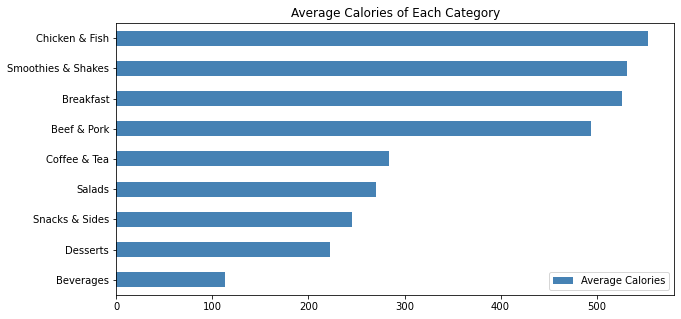

In [9]:
avg_cal_plot = avg_cal.plot(kind = "barh", color = "steelblue", \
                        figsize=(10,5), title='Average Calories of Each Category', legend=True)

In [10]:
# Nilai rata-rata kalori dari setiap menu McD
print("The average value calories of McDonalds's meals, including drink, is ", round(menu['Calories'].mean(axis=0), 2), "Cal.") 

The average value calories of McDonalds's meals, including drink, is  368.27 Cal.


## b) How much do beverages, like soda or coffee, contribute to the overall caloric intake?
<p>Standards of caloric intake are different from one to another country. In the US, men are recommended to consume 2,700 calories per day and 2,200 calories per day for women.</p>

In [11]:
# Menampilkan kontribusi beverages dalam asupan kebutuhan kalori 
bev_cal = pd.DataFrame({'Item': bev.Item, 'Calories': bev.Calories})
bev_cal['Men'] = bev_cal.Calories/2700
bev_cal['Women'] = bev_cal.Calories/2200
bev_cal.sort_values(by='Calories', ascending=False)

,Item,Calories,Men,Women
128,Sprite (Large),280,0.103704,0.127273
112,Coca-Cola Classic (Large),280,0.103704,0.127273
135,Minute Maid Orange Juice (Large),280,0.103704,0.127273
120,Dr Pepper (Large),270,0.100000,0.122727
127,Sprite (Medium),200,0.074074,0.090909
111,Coca-Cola Classic (Medium),200,0.074074,0.090909
119,Dr Pepper (Medium),190,0.070370,0.086364
134,Minute Maid Orange Juice (Medium),190,0.070370,0.086364
133,Minute Maid Orange Juice (Small),150,0.055556,0.068182
118,Dr Pepper (Small),140,0.051852,0.063636


In [12]:
# Menampilkan nilai rata-rata kalori pada kategori 'Beverages'
avg_bev = bev['Calories'].mean(axis=0)
print("Average calories of 'Beverages' category is", round(avg_bev, 2))

# Menampilkan nilai rata-rata kalori pada kategori 'Beverages' yang mempengaruhi asupan kebutuhan kalori pria dan wanita di USA
avg_bev = pd.to_numeric(avg_bev) 
bev_men = avg_bev/2700
print("'Beverages' contributes to caloric intake of men in USA averagely for", round(bev_men,2))

bev_wom = avg_bev/2200
print("'Beverages' contributes to caloric intake of women in USA averagely for", round(bev_wom, 2))

Average calories of 'Beverages' category is 113.7
'Beverages' contributes to caloric intake of men in USA averagely for 0.04
'Beverages' contributes to caloric intake of women in USA averagely for 0.05


In [13]:
# Menampilkan kontribusi coffe and tea dalam asupan kebutuhan kalori 
cnt_cal = pd.DataFrame({'Item': cnt.Item, 'Calories': cnt.Calories})
cnt_cal['Men'] = cnt_cal.Calories/2700
cnt_cal['Women'] = cnt_cal.Calories/2200
cnt_cal.sort_values(by='Calories', ascending=False)

,Item,Calories,Men,Women
231,Frappé Chocolate Chip (Large),760,0.281481,0.345455
228,Frappé Caramel (Large),670,0.248148,0.304545
225,Frappé Mocha (Large),670,0.248148,0.304545
230,Frappé Chocolate Chip (Medium),630,0.233333,0.286364
227,Frappé Caramel (Medium),550,0.203704,0.250000
...,...,...,...,...
145,Coffee (Small),0,0.000000,0.000000
138,Iced Tea (Medium),0,0.000000,0.000000
140,Iced Tea (Child),0,0.000000,0.000000
139,Iced Tea (Large),0,0.000000,0.000000


In [14]:
# Menampilkan nilai rata-rata kalori pada kategori 'Coffee & Tea'
avg_cnt = cnt['Calories'].mean(axis=0)
print("Average calories of 'Beverages' category is", round(avg_cnt, 2))

# Menampilkan nilai rata-rata kalori pada kategori 'Coffee & Tea' yang mempengaruhi asupan kebutuhan kalori pria dan wanita di USA
avg_cnt = pd.to_numeric(avg_cnt) 
cnt_men = avg_cnt/2700
print("'Coffee & Tea' contributes to caloric intake of men in USA averagely for", round(cnt_men,2))

cnt_wom = avg_cnt/2200
print("'Coffee & Tea' contributes to caloric intake of women in USA averagely for", round(cnt_wom, 2))

Average calories of 'Beverages' category is 283.89
'Coffee & Tea' contributes to caloric intake of men in USA averagely for 0.11
'Coffee & Tea' contributes to caloric intake of women in USA averagely for 0.13


## c) Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?
<p>Standards of caloric intake are different from one to another country. In the US, men are recommended to consume 2,700 calories per day and 2,200 calories per day for women.</p>

In [15]:
# Exploring the amount of calories on Crispy Chicken category
sand = menu[menu['Item'].str.contains('Sandwich')]
sand_cal = pd.DataFrame({'Item': sand.Item, 'Calories': sand.Calories})
print(sand_cal)

                                          Item  Calories
57     Premium Crispy Chicken Classic Sandwich       510
58    Premium Grilled Chicken Classic Sandwich       350
59        Premium Crispy Chicken Club Sandwich       670
60       Premium Grilled Chicken Club Sandwich       510
61   Premium Crispy Chicken Ranch BLT Sandwich       610
62  Premium Grilled Chicken Ranch BLT Sandwich       450
63     Bacon Clubhouse Crispy Chicken Sandwich       750
64    Bacon Clubhouse Grilled Chicken Sandwich       590
65      Southern Style Crispy Chicken Sandwich       430


Text(0.5, 1.0, 'Total Calories in Sandwich Item Category (in Cal)')

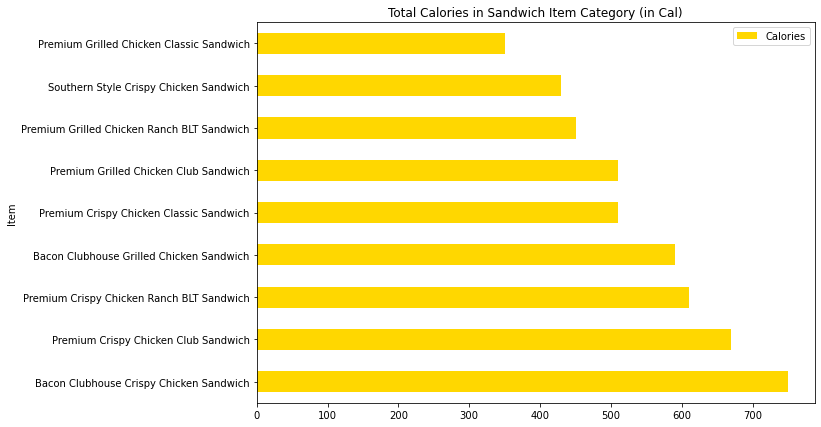

In [16]:
sand_sort = sand_cal.sort_values('Calories', ascending=False)
ax = sand_sort.plot.barh(x='Item', y='Calories', figsize= (10,7), color='gold')
ax.set_title("Total Calories in Sandwich Item Category (in Cal)")

Text(0.5, 1.0, 'Total Calories in Crispy Chicken Sandwich Item Category (in Cal)')

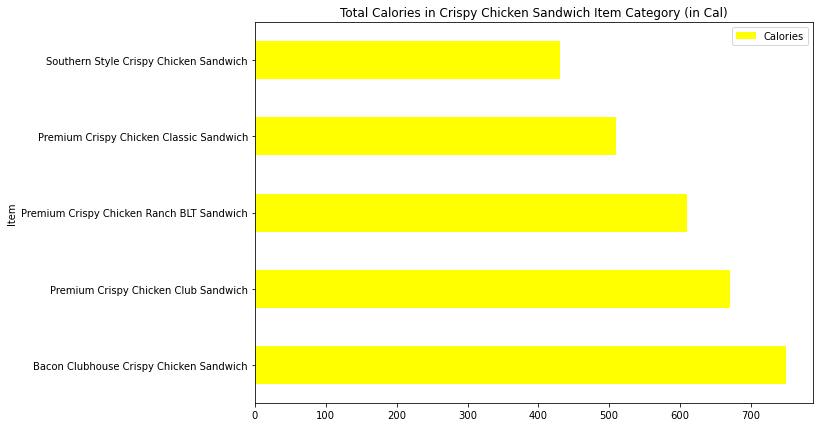

In [18]:
# Exploring the amount of calories on Crispy Chicken Sandwich category
crispy = sand[sand['Item'].str.contains('Crispy Chicken')]
crispy_cal = pd.DataFrame({'Item': crispy.Item, 'Calories': crispy.Calories})
crispy_sort = crispy_cal.sort_values('Calories', ascending=False)
ax = crispy_sort.plot.barh(x='Item', y='Calories', figsize= (10,7), color='yellow')
ax.set_title("Total Calories in Crispy Chicken Sandwich Item Category (in Cal)")

In [19]:
# Average calories on Crispy Chicken Category
avg_crispy_cal = crispy.Calories.mean(axis=0)
print("Average calories on Crispy Chicken Sandwich category is ", avg_crispy_cal, "Cal.")

Average calories on Crispy Chicken Sandwich category is  594.0 Cal.


Text(0.5, 1.0, 'Total Calories in Grilled Chicken Sandwich Item Category (in Cal)')

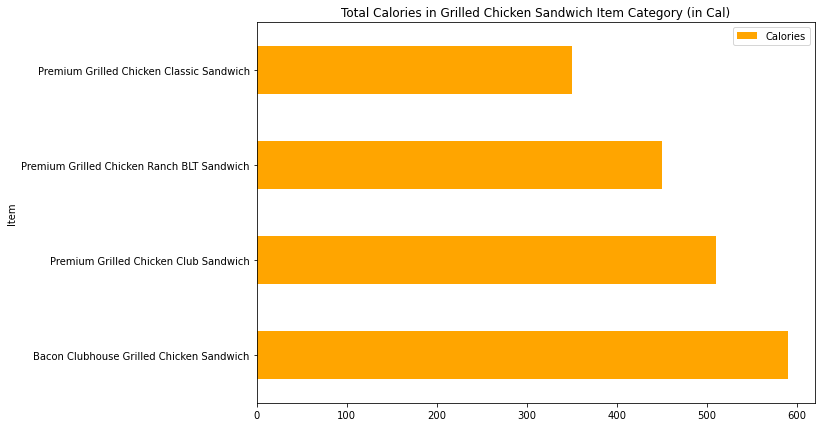

In [20]:
# Exploring the amount of calories on Grilled Chicken category
grilled = sand[sand['Item'].str.contains('Grilled Chicken')]
grilled_cal = pd.DataFrame({'Item': grilled.Item, 'Calories': grilled.Calories})
grilled_sort = grilled_cal.sort_values('Calories', ascending=False)
ax = grilled_sort.plot.barh(x='Item', y='Calories', figsize= (10,7), color='orange')
ax.set_title("Total Calories in Grilled Chicken Sandwich Item Category (in Cal)")

In [21]:
# Average calories on Grilled Chicken Category
avg_grilled_cal = round(grilled.Calories.mean(axis=0), 2)
print("Average calories on Grilled Chicken category is ", avg_grilled_cal, "Cal.")

Average calories on Grilled Chicken category is  475.0 Cal.


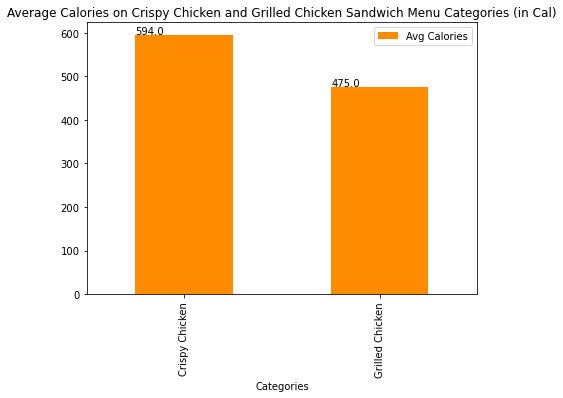

In [22]:
# Get visual comparison of Crispy vs Grilled on calories
avg_cal = pd.DataFrame({'Categories':['Crispy Chicken', 'Grilled Chicken'], 'Avg Calories': [avg_crispy_cal, avg_grilled_cal]})
ax = avg_cal.plot.bar(x = 'Categories', y = 'Avg Calories', figsize=(7,5),color='darkorange')
ax.set_title("Average Calories on Crispy Chicken and Grilled Chicken Sandwich Menu Categories (in Cal)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can conclude that Crispy Chicken category has higher average calories than Grilled Chicken category.

Now take a look at the Cholesterol and Sodium inside those categories.

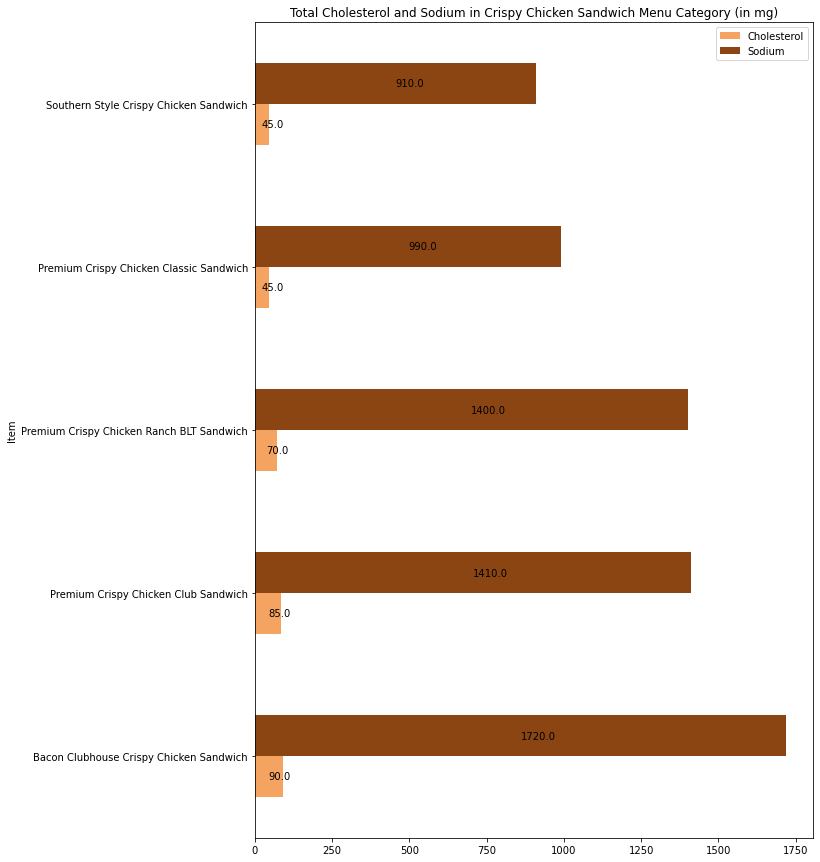

In [23]:
# Get the amount of cholesterol and sodium in Crispy Chicken category
crispy_chsod = pd.DataFrame({'Item': crispy.Item, 'Cholesterol': crispy.Cholesterol, 'Sodium': crispy.Sodium})
crispy_chsod_sort = crispy_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = crispy_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['sandybrown', 'saddlebrown'])
ax.set_title("Total Cholesterol and Sodium in Crispy Chicken Sandwich Menu Category (in mg)")
#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_x() * 1.005, p.get_width() * 1.005))
#ax = crispy.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

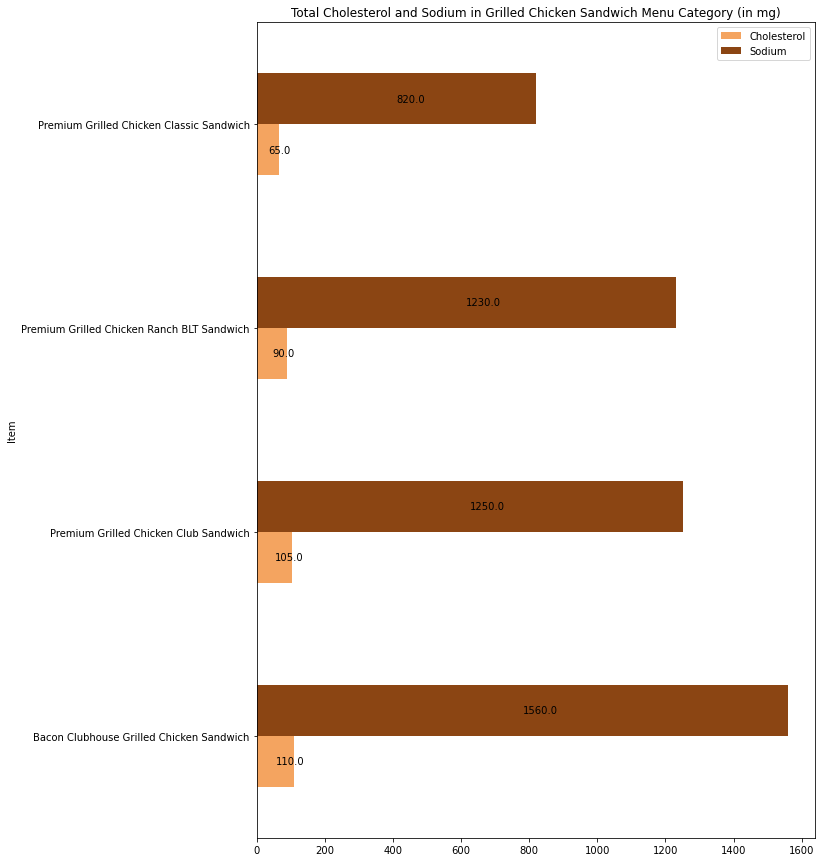

In [24]:
# Get the amount of cholesterol and sodium in Grilled Chicken category
grilled_chsod = pd.DataFrame({'Item': grilled.Item, 'Cholesterol': grilled.Cholesterol, 'Sodium': grilled.Sodium})
grilled_chsod_sort = grilled_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = grilled_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['sandybrown', 'saddlebrown'])
ax.set_title("Total Cholesterol and Sodium in Grilled Chicken Sandwich Menu Category (in mg)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Note: The amount of cholesterol in this menu set is not always directly proportional to the amount of sodium. For example, Premium Crispy Chicken Club Sandwich with 1410mg of sodium has 85mg of cholesterol, while Premium McWrap Southwest Chicken (Crispy Chicken) with 1480mg of sodium (which is higher than the previous item) only has 65mg of cholesterol.

So does in Grilled Chicken category, Premium Grilled Chicken Club Sandwich with 1250mg of sodium has 105mg of cholesterol, while Premium McWrap Southwest Chicken (Grilled Chicken) with 1370mg of sodium has 95mg of cholesterol.

Now let's compare the average amount of those nutrients in both categories.

In [25]:
# Get the average of sodium and cholesterol amount in Crispy Chicken category
avg_crispy_sod = round(crispy.Sodium.mean(axis=0), 2)
avg_crispy_ch = round(crispy.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Crispy Chicken Sandwich category is ", avg_crispy_sod, "mg, while the average amount of cholesterol is ", avg_crispy_ch, "mg.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_grilled_sod = round(grilled.Sodium.mean(axis=0), 2)
avg_grilled_ch = round(grilled.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Grilled Chicken Sandwich category is ", avg_grilled_sod, "mg, while the average amount of cholesterol is ", avg_grilled_ch, "mg.")

The average amount of sodium in Crispy Chicken Sandwich category is  1286.0 mg, while the average amount of cholesterol is  67.0 mg.
The average amount of sodium in Grilled Chicken Sandwich category is  1215.0 mg, while the average amount of cholesterol is  92.5 mg.


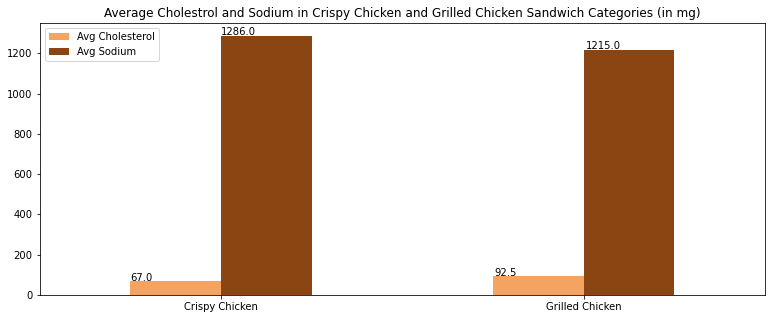

In [26]:
# Plot a bar chart for visual comparison
avg_sod = [avg_crispy_sod, avg_grilled_sod]
avg_ch = [avg_crispy_ch, avg_grilled_ch]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_sodch = pd.DataFrame({'Avg Cholesterol': avg_ch, 'Avg Sodium': avg_sod}, index=index)
ax = avg_sodch.plot.bar(rot=0, color=['sandybrown', 'saddlebrown'], figsize=(13,5))
ax.set_title("Average Cholestrol and Sodium in Crispy Chicken and Grilled Chicken Sandwich Categories (in mg)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#plt.barh(['Avg Sodium on Crispy Chicken items', 'Avg Cholesterol on Crispy Chicken items', 'Avg Sodium on Grilled Chicken items', 'Avg Cholesterol on Grilled Chicken items'], [avg_crispy_sod, avg_crispy_ch, avg_grilled_sod, avg_grilled_ch])

We can concluded that Crispy Chicken category is higher in average sodium amount and lower in average cholesterol amount than Grilled Chicken Category

Reported from US Department of Agriculture, Carbohydrates provide 4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram. (https://www.nal.usda.gov/fnic/how-many-calories-are-one-gram-fat-carbohydrate-or-protein). So the amount of those 3 nutrients is already depicted in calories chart.

Now take a look on the amount of sugar and dietary fiber in both categories.

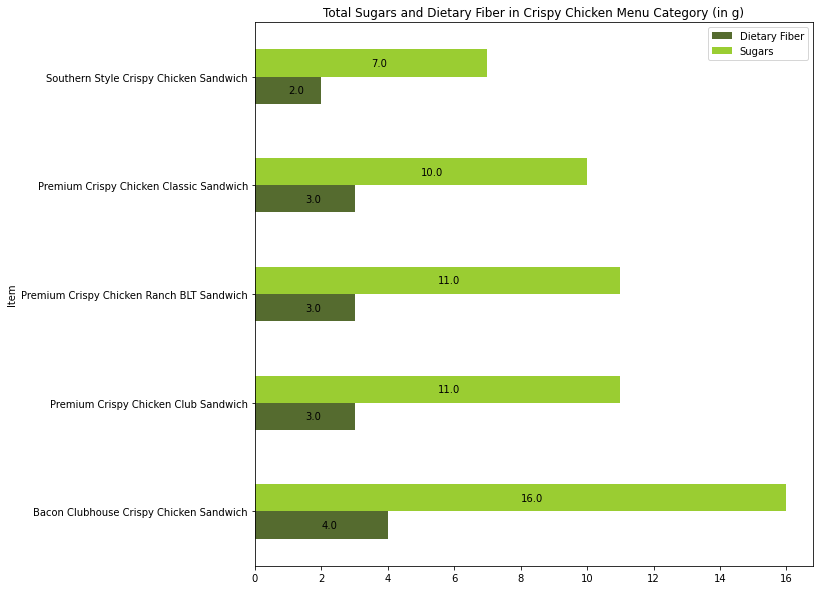

In [27]:
# Get the amount of sugar and dietary fiber in Crispy Chicken category
crispy_sdf = pd.DataFrame({'Item': crispy.Item, 'Sugars': crispy.Sugars, 'Dietary Fiber': crispy['Dietary Fiber']})
crispy_sdf_sort = crispy_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = crispy_sdf_sort.plot.barh(x='Item', y=['Dietary Fiber','Sugars'], stacked=False, figsize= (10,10), color=['darkolivegreen', 'yellowgreen'])
ax.set_title("Total Sugars and Dietary Fiber in Crispy Chicken Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

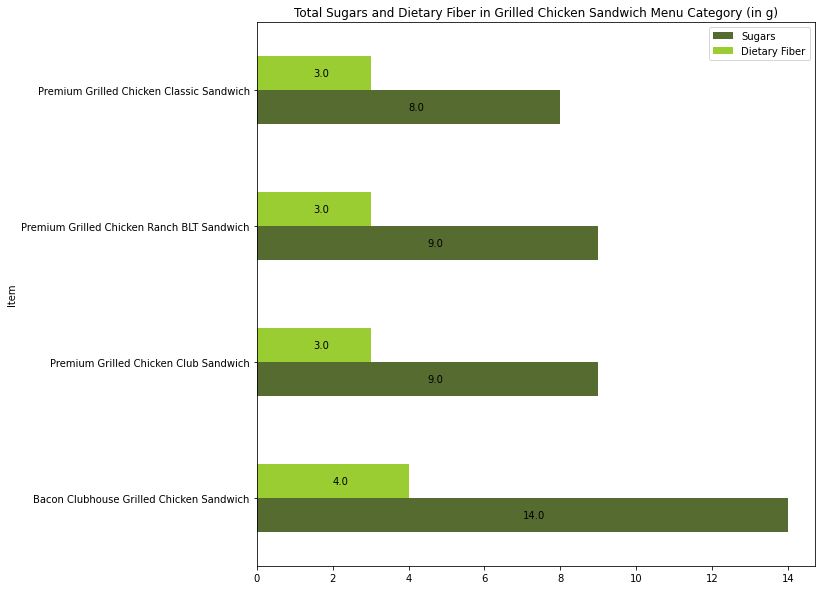

In [28]:
# Get the amount of sugar and dietary fiber in Grilled Chicken category
grilled_sdf = pd.DataFrame({'Item': grilled.Item, 'Sugars': grilled.Sugars, 'Dietary Fiber': grilled['Dietary Fiber']})
grilled_sdf_sort = grilled_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = grilled_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['darkolivegreen', 'yellowgreen'])
ax.set_title("Total Sugars and Dietary Fiber in Grilled Chicken Sandwich Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of sugars and dietary fiber on both categories.

In [29]:
# Get the average of sugars and dietary fiber amount in Crispy Chicken category
avg_crispy_sug = round(crispy.Sugars.mean(axis=0), 2)
avg_crispy_df = round(crispy['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Crispy Chicken Sandwich category is ", avg_crispy_sug, "g, while the average amount of dietary fiber is ", avg_crispy_df, "g.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_grilled_sug = round(grilled.Sugars.mean(axis=0), 2)
avg_grilled_df = round(grilled['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Grilled Chicken Sandwich category is ", avg_grilled_sug, "g, while the average amount of dietary fiber is ", avg_grilled_df, "g.")

The average amount of sugars in Crispy Chicken Sandwich category is  11.0 g, while the average amount of dietary fiber is  3.0 g.
The average amount of sugars in Grilled Chicken Sandwich category is  10.0 g, while the average amount of dietary fiber is  3.25 g.


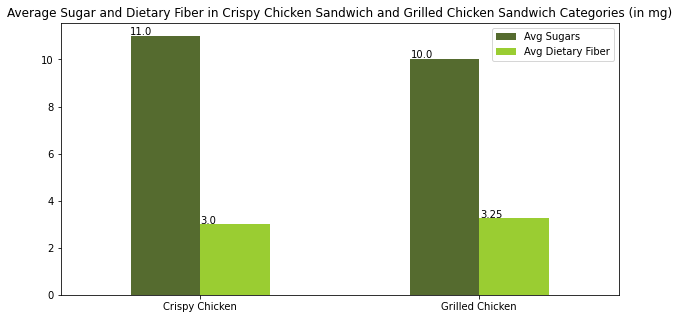

In [30]:
# Plot a bar chart for visual comparison
avg_sug = [avg_crispy_sug, avg_grilled_sug]
avg_df = [avg_crispy_df, avg_grilled_df]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_sdf = pd.DataFrame({'Avg Sugars': avg_sug,
                   'Avg Dietary Fiber': avg_df}, index=index)
ax = avg_sdf.plot.bar(rot=0, color=['darkolivegreen', 'yellowgreen'], figsize=(10,5))
ax.set_title("Average Sugar and Dietary Fiber in Crispy Chicken Sandwich and Grilled Chicken Sandwich Categories (in mg)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can concluded that Crispy Chicken category has higher average amount of sugar and lower average amount of dietary fiber than Grilled Chicken category.

Now take a look on the amount of vitamins and minerals in both categories. the types of vitamins and minerals that are in the dataset are vitamin A & C, calcium, and iron. All in daily value percentages (%DV).

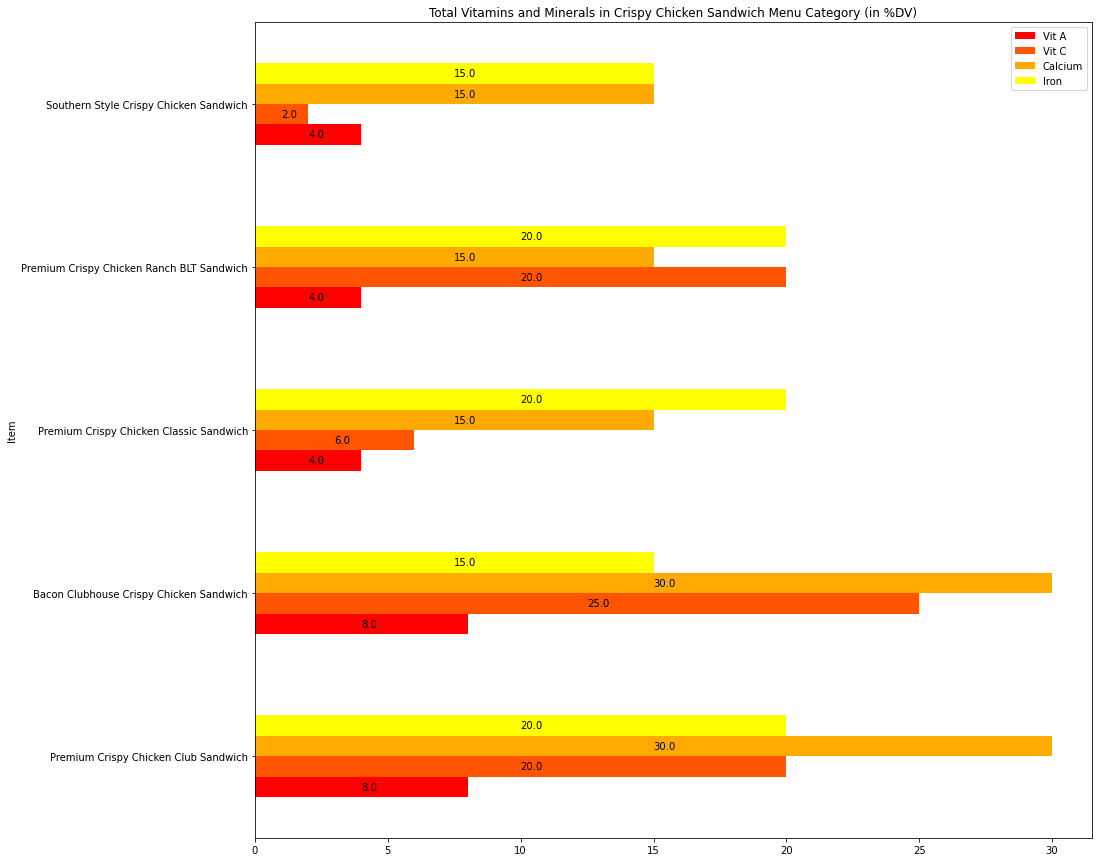

In [31]:
# Get the amount of vitamins and minerals in Crispy Chicken category
crispy_vm = pd.DataFrame({'Item': crispy.Item, 'Vit A': crispy['Vitamin A (% Daily Value)'], 'Vit C': crispy['Vitamin C (% Daily Value)'], 'Calcium': crispy['Calcium (% Daily Value)'], 'Iron': crispy['Iron (% Daily Value)']})
crispy_vm_sort = crispy_vm.sort_values('Vit A', ascending=False) #sort by vit A amount
ax = crispy_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (15,15), colormap='autumn')
ax.set_title("Total Vitamins and Minerals in Crispy Chicken Sandwich Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

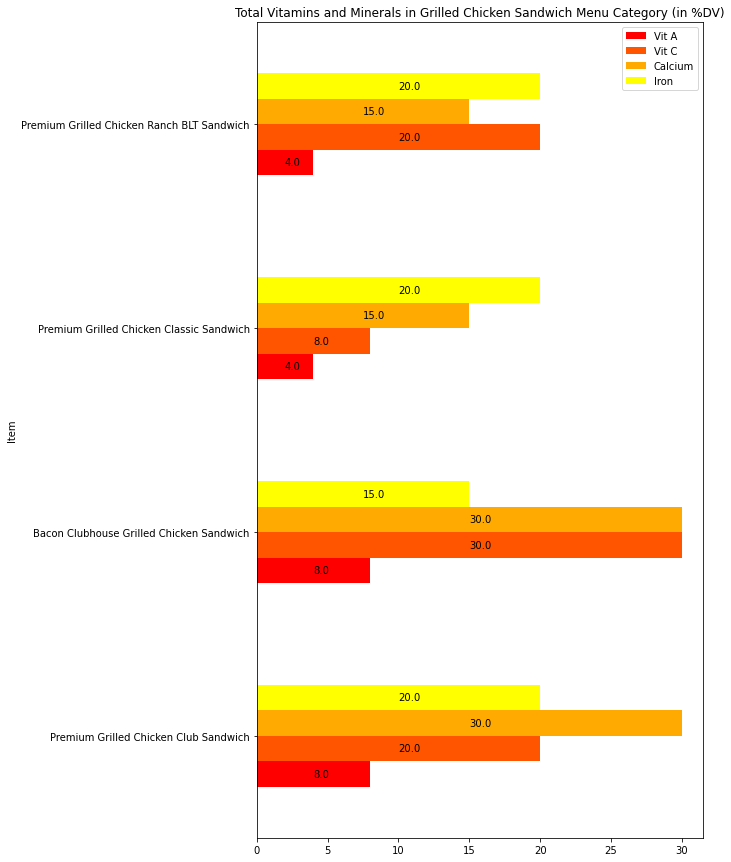

In [32]:
# Get the amount of vitamins and minerals in Grilled Chicken category
grilled_vm = pd.DataFrame({'Item': grilled.Item, 'Vit A': grilled['Vitamin A (% Daily Value)'], 'Vit C': grilled['Vitamin C (% Daily Value)'], 'Calcium': grilled['Calcium (% Daily Value)'], 'Iron': grilled['Iron (% Daily Value)']})
grilled_vm_sort = grilled_vm.sort_values('Vit A', ascending=False) #sort by vit A amount
ax = grilled_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='autumn')
ax.set_title("Total Vitamins and Minerals in Grilled Chicken Sandwich Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of vitamins and minerals on both categories

In [33]:
# Get the average of vitamins and minerals in Crispy Chicken category
avg_crispy_vita = round(crispy_vm['Vit A'].mean(axis=0), 2)
avg_crispy_vitc = round(crispy_vm['Vit C'].mean(axis=0), 2)
avg_crispy_calc = round(crispy_vm['Calcium'].mean(axis=0), 2)
avg_crispy_iron = round(crispy_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Crispy Chicken Sandwich category is ", avg_crispy_vita, "%DV,", avg_crispy_vitc, "%DV,", avg_crispy_calc, "%DV, and", avg_crispy_iron, "%DV.")

# Get the average of vitamins and minerals in Grilled Chicken category
avg_grilled_vita = round(grilled_vm['Vit A'].mean(axis=0), 2)
avg_grilled_vitc = round(grilled_vm['Vit C'].mean(axis=0), 2)
avg_grilled_calc = round(grilled_vm['Calcium'].mean(axis=0), 2)
avg_grilled_iron = round(grilled_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Grilled Chicken Sandwich category is ", avg_grilled_vita, "%DV,", avg_grilled_vitc, "%DV,", avg_grilled_calc, "%DV, and", avg_grilled_iron, "%DV.")

The average amount of Vit A, Vit C, Calcium, and Iron respectively in Crispy Chicken Sandwich category is  5.6 %DV, 14.6 %DV, 21.0 %DV, and 18.0 %DV.
The average amount of Vit A, Vit C, Calcium, and Iron respectively in Grilled Chicken Sandwich category is  6.0 %DV, 19.5 %DV, 22.5 %DV, and 18.75 %DV.


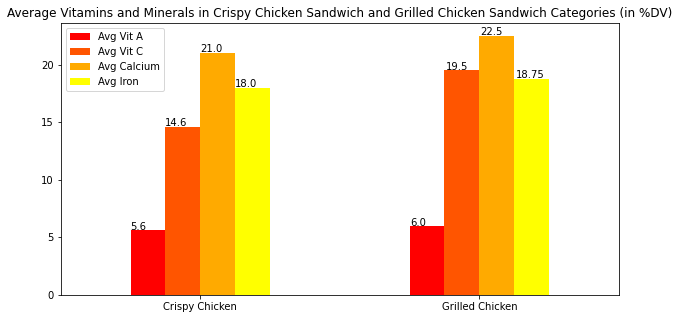

In [34]:
# Plot a bar chart for visual comparison
avg_vita = [avg_crispy_vita, avg_grilled_vita]
avg_vitc = [avg_crispy_vitc, avg_grilled_vitc]
avg_calc = [avg_crispy_calc, avg_grilled_calc]
avg_iron = [avg_crispy_iron, avg_grilled_iron]
index = ['Crispy Chicken', 'Grilled Chicken']
avg_vm = pd.DataFrame({'Avg Vit A': avg_vita,
                   'Avg Vit C': avg_vitc,
                   'Avg Calcium': avg_calc,
                   'Avg Iron': avg_iron}, index=index)
ax = avg_vm.plot.bar(rot=0, colormap='autumn', figsize=(10,5))
ax.set_title("Average Vitamins and Minerals in Crispy Chicken Sandwich and Grilled Chicken Sandwich Categories (in %DV)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can concluded that Crispy Chicken category has higher average amount of vitamin C and lower average amount of vitamin A, calcium, and iron than Grilled Chicken category.

So, to answer Problem 3, despite the health aspects, menu items in Grilled Chicken category has more nutritional values in terms of the average amount of dietary fiber, cholesterol, vitamin A & C, calcium, and iron than menu items in Crispy Chicken category. While Crispy Chicken category has higher average amount of calories, sodium, and sugar than Grilled Chicken category. To determine whether a food item is healthy or not, we have to do lab test. In the mean time, eat wisely.!

## Egg Whites and Whole Eggs

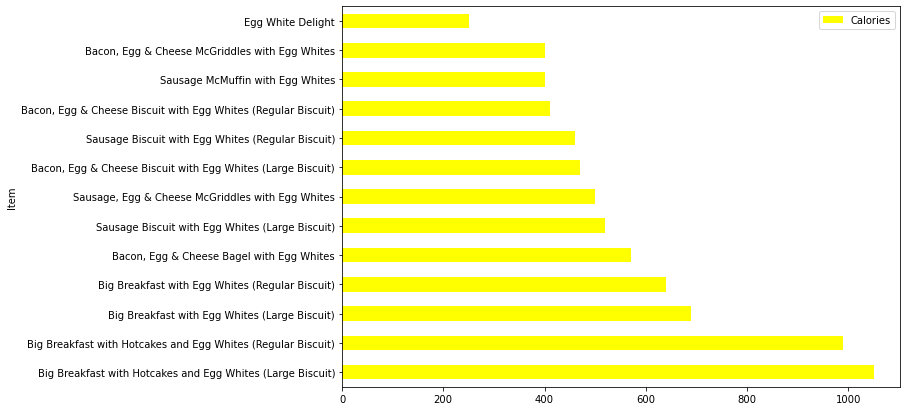

In [35]:
# Exploring the amount of calories on Crispy Chicken category
whites = menu[menu['Item'].str.contains('Egg White')]
whites_cal = pd.DataFrame({'Item': whites.Item, 'Calories': whites.Calories})
whites_sort = whites_cal.sort_values('Calories', ascending=False)
whites_sort.plot.barh(x='Item', y='Calories', figsize= (10,7), color='yellow')

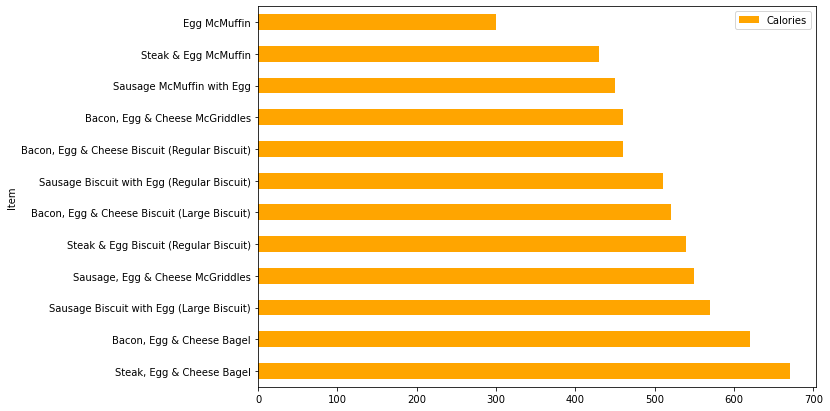

In [36]:
# Exploring the amount of calories on Whole Eggs category
whole = menu[menu['Item'].str.contains('Egg')] 
whole = whole[~whole['Item'].str.contains('White')]
whole_cal = pd.DataFrame({'Item': whole.Item, 'Calories': whole.Calories})
whole_sort = whole_cal.sort_values('Calories', ascending=False)
whole_sort.plot.barh(x='Item', y='Calories', figsize= (10,7), color='orange')

In [37]:
# Average calories on Egg Whites Category
avg_whites_cal = whites.Calories.mean(axis=0)
print("Average calories on Egg Whites category is ", round(avg_whites_cal, 2), "Cal.")

# Average calories on Whole Egg Category
avg_whole_cal = whole.Calories.mean(axis=0)
print("Average calories on Whole Egg category is ", round(avg_whole_cal, 2), "Cal.")

Average calories on Egg Whites category is  565.38 Cal.
Average calories on Whole Egg category is  506.67 Cal.


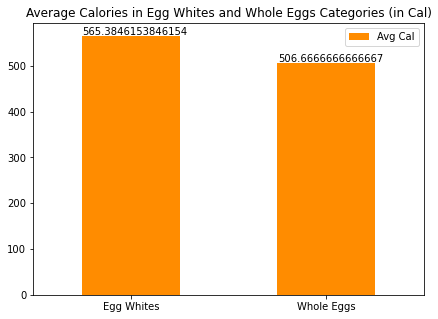

In [38]:
# Plot a bar chart for visual comparison
avg_egg_cal = [avg_whites_cal, avg_whole_cal]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_cal = pd.DataFrame({'Avg Cal': avg_egg_cal}, index=index)
ax = avg_egg_cal.plot.bar(rot=0, figsize=(7,5), color='darkorange')
ax.set_title("Average Calories in Egg Whites and Whole Eggs Categories (in Cal)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

From analysis above, we can conclude that items in Egg Whites category has higher average amount of calories than items in Whole Eggs category.

Now, let's look at cholesterol and sodium in them!

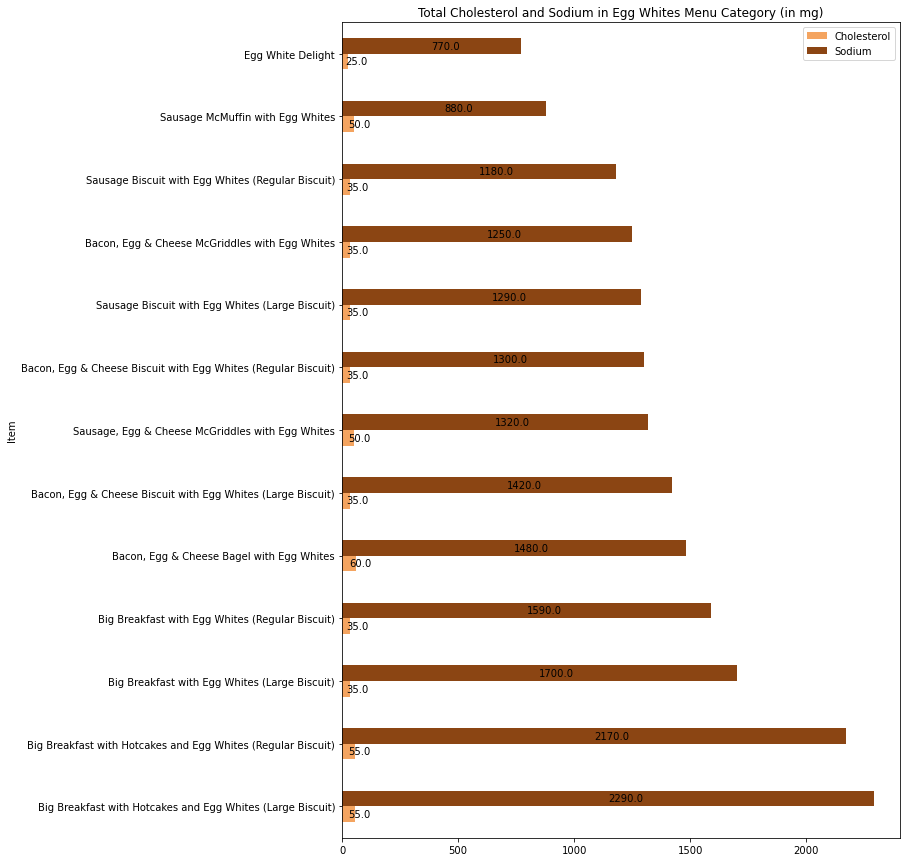

In [39]:
# Get the amount of cholesterol and sodium in Egg Whites category
whites_chsod = pd.DataFrame({'Item': whites.Item, 'Cholesterol': whites.Cholesterol, 'Sodium': whites.Sodium})
whites_chsod_sort = whites_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = whites_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['sandybrown', 'saddlebrown'])
ax.set_title("Total Cholesterol and Sodium in Egg Whites Menu Category (in mg)")
#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_x() * 1.005, p.get_width() * 1.005))
#ax = crispy.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

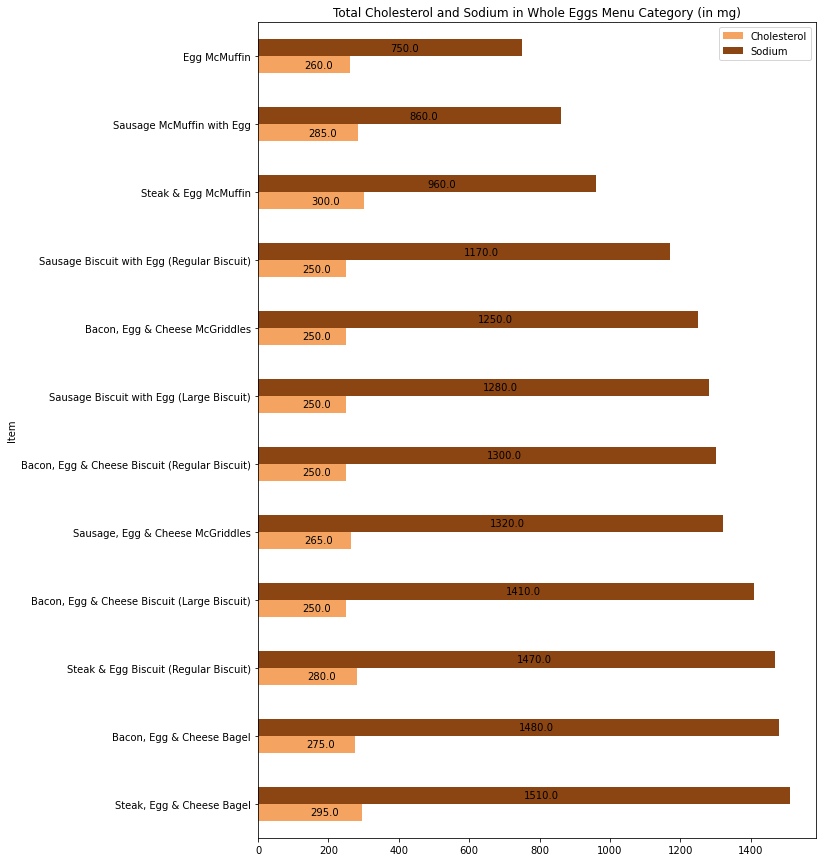

In [40]:
# Get the amount of cholesterol and sodium in Whole Whites category
whole_chsod = pd.DataFrame({'Item': whole.Item, 'Cholesterol': whole.Cholesterol, 'Sodium': whole.Sodium})
whole_chsod_sort = whole_chsod.sort_values('Sodium', ascending=False) #sort by sodium amount
ax = whole_chsod_sort.plot.barh(x='Item', y=['Cholesterol','Sodium'], stacked=False, figsize= (10,15), color=['sandybrown', 'saddlebrown'])
ax.set_title("Total Cholesterol and Sodium in Whole Eggs Menu Category (in mg)")
#for p in ax.patches:
#    ax.annotate(str(p.get_width()), (p.get_x() * 1.005, p.get_width() * 1.005))
#ax = crispy.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Note: As stated in previous problem, the amount of cholesterol in this menu set is not always directly proportional to the amount of sodium. 

Now let's compare the average amount of those nutrients in both categories.

In [41]:
# Get the average of sodium and cholesterol amount in Egg Whites category
avg_whites_sod = round(whites.Sodium.mean(axis=0), 2)
avg_whites_ch = round(whites.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Egg Whites category is ", avg_whites_sod, "mg, while the average amount of cholesterol is ", avg_whites_ch, "mg.")

# Get the average of sodium and cholesterol amount in Whole Eggs category
avg_whole_sod = round(whole.Sodium.mean(axis=0), 2)
avg_whole_ch = round(whole.Cholesterol.mean(axis=0), 2)
print("The average amount of sodium in Whole Eggs category is ", avg_whole_sod, "mg, while the average amount of cholesterol is ", avg_whole_ch, "mg.")

The average amount of sodium in Egg Whites category is  1433.85 mg, while the average amount of cholesterol is  41.54 mg.
The average amount of sodium in Whole Eggs category is  1230.0 mg, while the average amount of cholesterol is  267.5 mg.


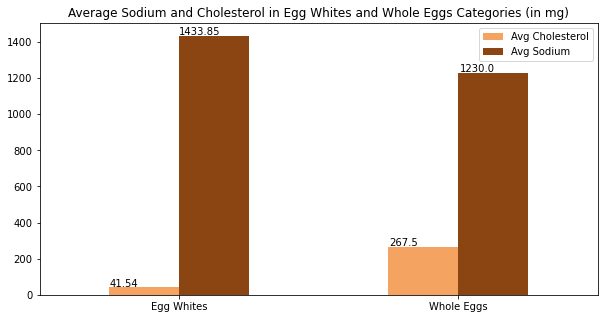

In [42]:
# Plot a bar chart for visual comparison
avg_egg_sod = [avg_whites_sod, avg_whole_sod]
avg_egg_ch = [avg_whites_ch, avg_whole_ch]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_sodch = pd.DataFrame({'Avg Cholesterol': avg_egg_ch, 'Avg Sodium': avg_egg_sod}, index=index)
ax = avg_egg_sodch.plot.bar(rot=0, color=['sandybrown', 'saddlebrown'], figsize=(10,5))
ax.set_title("Average Sodium and Cholesterol in Egg Whites and Whole Eggs Categories (in mg)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
#plt.barh(['Avg Sodium on Crispy Chicken items', 'Avg Cholesterol on Crispy Chicken items', 'Avg Sodium on Grilled Chicken items', 'Avg Cholesterol on Grilled Chicken items'], [avg_crispy_sod, avg_crispy_ch, avg_grilled_sod, avg_grilled_ch])

We can conclude that Egg Whites category has higher average amount of sodium, and lower average cholesterol amount than Whole Eggs category.

Now, let's take a look at the amount of sugars and dietary fiber in both category.

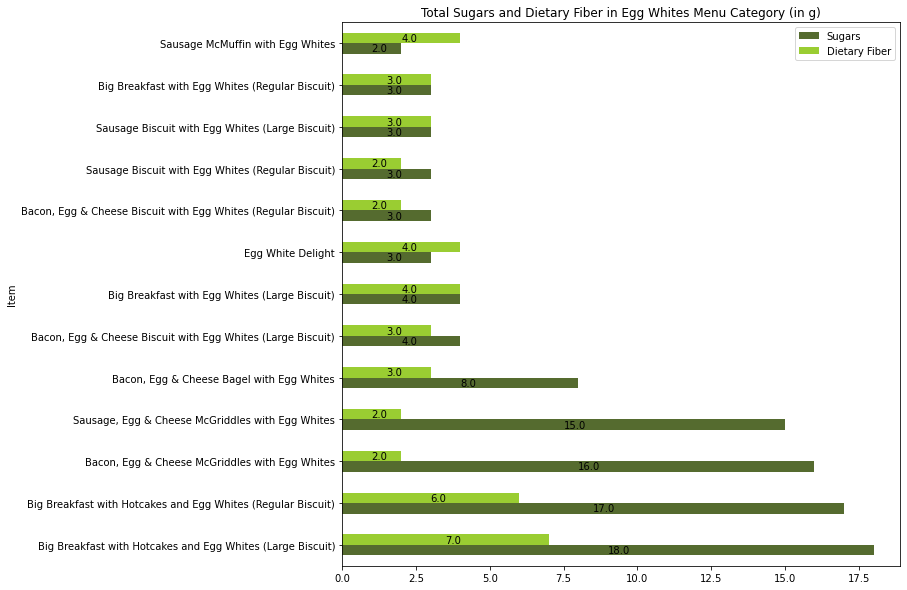

In [43]:
# Get the amount of sugar and dietary fiber in Egg Whites category
whites_sdf = pd.DataFrame({'Item': whites.Item, 'Sugars': whites.Sugars, 'Dietary Fiber': whites['Dietary Fiber']})
whites_sdf_sort = whites_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = whites_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['darkolivegreen', 'yellowgreen'])
ax.set_title("Total Sugars and Dietary Fiber in Egg Whites Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

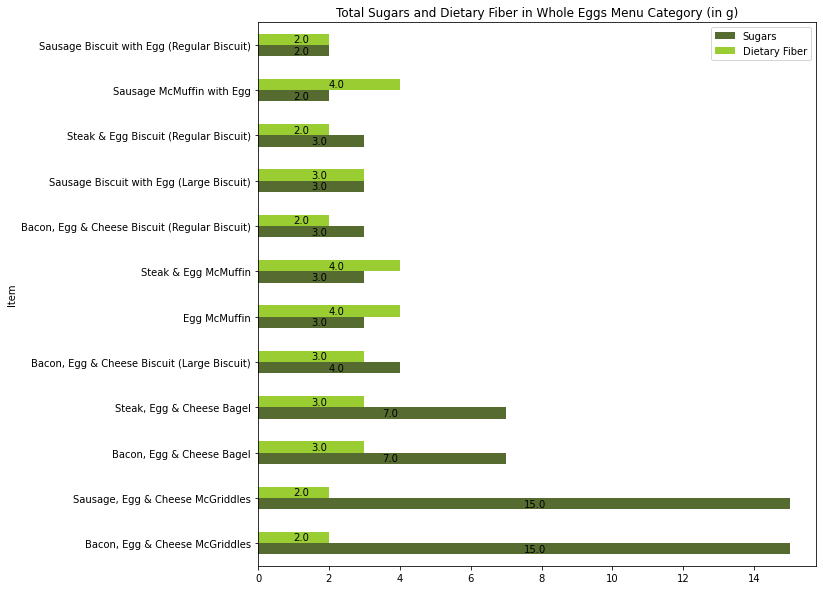

In [44]:
# Get the amount of sugar and dietary fiber in Whole Eggs category
whole_sdf = pd.DataFrame({'Item': whole.Item, 'Sugars': whole.Sugars, 'Dietary Fiber': whole['Dietary Fiber']})
whole_sdf_sort = whole_sdf.sort_values('Sugars', ascending=False) #sort by sugar amount
ax = whole_sdf_sort.plot.barh(x='Item', y=['Sugars','Dietary Fiber'], stacked=False, figsize= (10,10), color=['darkolivegreen', 'yellowgreen'])
ax.set_title("Total Sugars and Dietary Fiber in Whole Eggs Menu Category (in g)")
#ax = grilled.plot.barh(stacked=True, figsize=(10, 12))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of sugars and dietary fiber on both categories.

In [45]:
# Get the average of sugars and dietary fiber amount in Egg Whites category
avg_whites_sug = round(whites.Sugars.mean(axis=0), 2)
avg_whites_df = round(whites['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Egg Whites category is ", avg_whites_sug, "g, while the average amount of dietary fiber is ", avg_whites_df, "g.")

# Get the average of sodium and cholesterol amount in Grilled Chicken category
avg_whole_sug = round(whole.Sugars.mean(axis=0), 2)
avg_whole_df = round(whole['Dietary Fiber'].mean(axis=0), 2)
print("The average amount of sugars in Whole Whites category is ", avg_whole_sug, "g, while the average amount of dietary fiber is ", avg_whole_df, "g.")

The average amount of sugars in Egg Whites category is  7.62 g, while the average amount of dietary fiber is  3.46 g.
The average amount of sugars in Whole Whites category is  5.58 g, while the average amount of dietary fiber is  2.83 g.


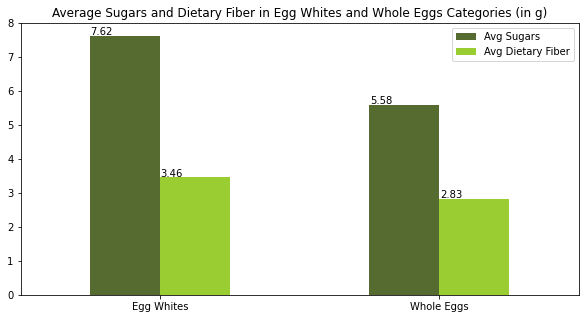

In [46]:
# Plot a bar chart for visual comparison
avg_egg_sug = [avg_whites_sug, avg_whole_sug]
avg_egg_df = [avg_whites_df, avg_whole_df]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_sdf = pd.DataFrame({'Avg Sugars': avg_egg_sug,
                   'Avg Dietary Fiber': avg_egg_df}, index=index)
ax = avg_egg_sdf.plot.bar(rot=0, color=['darkolivegreen', 'yellowgreen'], figsize=(10,5))
ax.set_title("Average Sugars and Dietary Fiber in Egg Whites and Whole Eggs Categories (in g)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Egg Whites category has higher average amount of sugars and dietary fiber than Whole Eggs category.

Now take a look on the amount of vitamins and minerals in both categories. the types of vitamins and minerals that are in the dataset are vitamin A & C, calcium, and iron. All in daily value percentages (%DV).

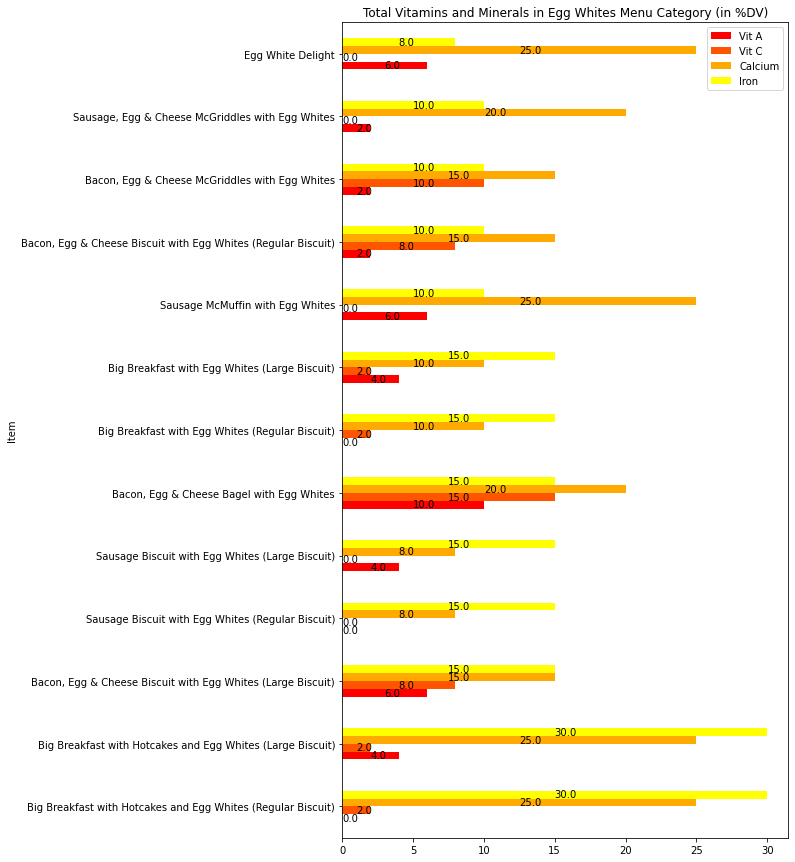

In [47]:
# Get the amount of vitamins and minerals in Egg Whites category
whites_vm = pd.DataFrame({'Item': whites.Item, 'Vit A': whites['Vitamin A (% Daily Value)'], 'Vit C': whites['Vitamin C (% Daily Value)'], 'Calcium': whites['Calcium (% Daily Value)'], 'Iron': whites['Iron (% Daily Value)']})
whites_vm_sort = whites_vm.sort_values('Iron', ascending=False) #sort by iron amount
ax = whites_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='autumn')
ax.set_title("Total Vitamins and Minerals in Egg Whites Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

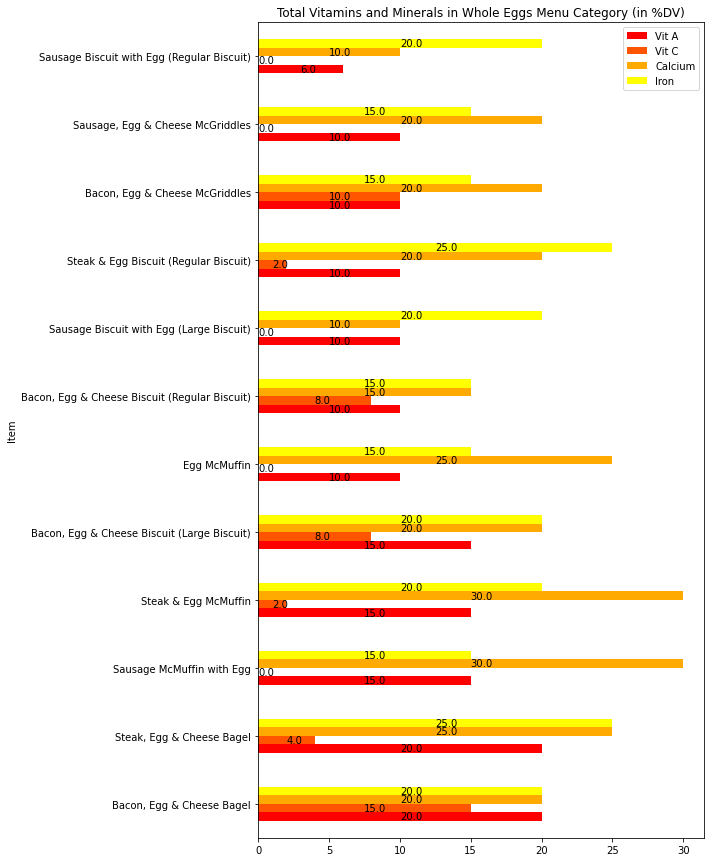

In [48]:
# Get the amount of vitamins and minerals in Whole Eggs category
whole_vm = pd.DataFrame({'Item': whole.Item, 'Vit A': whole['Vitamin A (% Daily Value)'], 'Vit C': whole['Vitamin C (% Daily Value)'], 'Calcium': whole['Calcium (% Daily Value)'], 'Iron': whole['Iron (% Daily Value)']})
whole_vm_sort = whole_vm.sort_values('Vit A', ascending=False) #sort by iron amount
ax = whole_vm_sort.plot.barh(x='Item', y=['Vit A','Vit C', 'Calcium', 'Iron'], stacked=False, figsize= (8,15), colormap='autumn')
ax.set_title("Total Vitamins and Minerals in Whole Eggs Menu Category (in %DV)")
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                horizontalalignment='left', verticalalignment='center') # Give annotation to the chart

Let's compare the average amount of vitamins and minerals on both categories

In [49]:
# Get the average of vitamins and minerals in Egg Whites category
avg_whites_vita = round(whites_vm['Vit A'].mean(axis=0), 2)
avg_whites_vitc = round(whites_vm['Vit C'].mean(axis=0), 2)
avg_whites_calc = round(whites_vm['Calcium'].mean(axis=0), 2)
avg_whites_iron = round(whites_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Egg Whites category is ", avg_whites_vita, "%DV,", avg_whites_vitc, "%DV,", avg_whites_calc, "%DV, and", avg_whites_iron, "%DV.")

# Get the average of vitamins and minerals in Whole Eggs category
avg_whole_vita = round(whole_vm['Vit A'].mean(axis=0), 2)
avg_whole_vitc = round(whole_vm['Vit C'].mean(axis=0), 2)
avg_whole_calc = round(whole_vm['Calcium'].mean(axis=0), 2)
avg_whole_iron = round(whole_vm['Iron'].mean(axis=0), 2)
print("The average amount of Vit A, Vit C, Calcium, and Iron respectively in Whole Eggs category is ", avg_whole_vita, "%DV,", avg_whole_vitc, "%DV,", avg_whole_calc, "%DV, and", avg_whole_iron, "%DV.")

The average amount of Vit A, Vit C, Calcium, and Iron respectively in Egg Whites category is  3.54 %DV, 3.77 %DV, 17.0 %DV, and 15.23 %DV.
The average amount of Vit A, Vit C, Calcium, and Iron respectively in Whole Eggs category is  12.58 %DV, 4.08 %DV, 20.42 %DV, and 18.75 %DV.


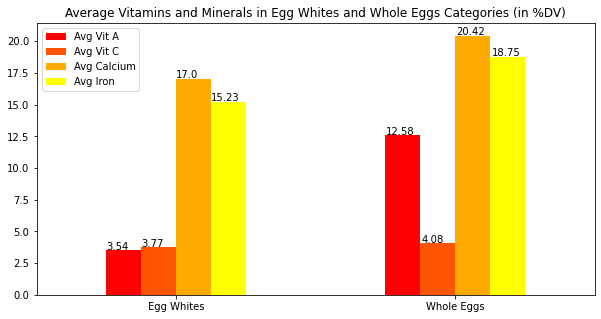

In [50]:
# Plot a bar chart for visual comparison
avg_egg_vita = [avg_whites_vita, avg_whole_vita]
avg_egg_vitc = [avg_whites_vitc, avg_whole_vitc]
avg_egg_calc = [avg_whites_calc, avg_whole_calc]
avg_egg_iron = [avg_whites_iron, avg_whole_iron]
index = ['Egg Whites', 'Whole Eggs']
avg_egg_vm = pd.DataFrame({'Avg Vit A': avg_egg_vita,
                   'Avg Vit C': avg_egg_vitc,
                   'Avg Calcium': avg_egg_calc,
                   'Avg Iron': avg_egg_iron}, index=index)
ax = avg_egg_vm.plot.bar(rot=0, colormap='autumn', figsize=(10,5))
ax.set_title("Average Vitamins and Minerals in Egg Whites and Whole Eggs Categories (in %DV)")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

We can concluded that Egg Whites category has lower average amount of vitamin A & C, calcium, and iron than Egg Whites category.

So, to answer Problem 4, despite the health aspects, menu items in Egg Whites category has more nutritional values in terms of the average amount of calorie, sodium, sugar, dietary fiber, vitamin A & C, calcium, and iron than menu items in Whole Eggs category. While Whole Eggs category has higher average amount of cholesterol than Egg Whites category. To determine whether a food item is healthy or not, we have to do lab test. In the mean time, eat wisely.

## e) What is the least number of items could you order from the menu to meet one day's nutritional requirements?